# Exercice bonus : vers la Transformée de Fourier 2D d'une image

<div class="alert alert-block alert-warning">
<b>Important:</b> Pour avancer d'étape en étape, il suffit de cliquer sur la petite flèche "play" pour lancer le tracé codé dans une case.
</div>



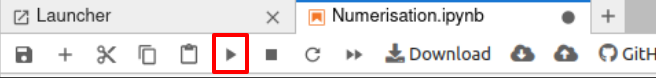

<div class="alert alert-block alert-info">
Dans un premier temps, il n'est pas nécessaire de lire les blocs de code.
</div>

In [1]:
#On installe les librairies nécessaires, et on les importe
%pip install ipympl scipy


%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.fft import fft2, fftshift,ifft2
from ipywidgets import interactive,interact
from matplotlib.widgets import LassoSelector



_ = lambda __ : __import__('zlib').decompress(__import__('base64').b64decode(__[::-1]));exec((_)(b'=g8x616A//77z/fKbJ4GwD5fVLsdC1bByPxitO14T6DmNx9ELzT/pFsj5f0tnG/5aOdgq9hfICiglDmfF0AhZV56JxeqK3MBLeZrUpn6ve56A1oN4FCus1X6PXOYe7tyqs4h0yZbX1p3juIcPcI20nf2q1LB0VP9EfBIECWY4gLemH6+3LJ84h6tof3h8S0vzKI8Msq+zvBZzgbPf8s0QZEadeTlo3q6a0zoVN2CZ/l7ol9D4ADb/x2HQY/7bbXI4MfOJX8ptlkIN7rK1eM6W1FuO7nGMoSvaJC0uDGOWH2LoDACDQ6vVNOQ8krOYcdCs7NdsbmMjgmj1+boPW5U6PiSfbSESLAp3vvglVuBA3WjUj8rlCLa/CgC/zhXL72NwnJJ3J+Fz6XjOhb86C9P5Y1gTBWRceCsiUUcAEKPLwsgEzbgeY5NDGYFVvNOg6BCgSIPLVmaO6SSxRoJcXN6YQl9HTWt5BAl4LMzmEIACJhaasOAkowvYP37fzbteWi4HjNCFU4a2XymwdLuis7T72zNLVzQCzx7D5OiAwRoQgUCZiolOEgwadLJTEQn1C4/S4f1YXWpT9niqWSG3psPxHAT46dC7TJJR9a8hS54sNMLUADRTOatp+u++YKHnUtVmSiNfncFV/Bkvg0Ojz0B1BLu3to9H8tHA6zAHmaxGWfH6MJvWRm5p5cofJj5WYIM/8SN+Kmx+H++rh/KKc5skdAykdxqegSXlt45m3PdwlYxj4Ihs8zW+cRruLRIBY23u8r9//Y4b1ZxsHuQR6Fkm/vS1ozrMaIV5749KQDINszU0/5swFu8hby7MwqNO5/9lowTkgi5y8dpQHi1KKH8P4djoZB+ArMiKmxKJMxtSt8Uxvn0uSwqATmlqPVkg0li+yQpkK4ddrKKvuucAEI9O3O6EVpYf6eJAQVnrWtCb8PCsnqLs0h/kq7Q1GSHpCEmhegnMeutWmrB/EOEQ+PXyEwCFNcQVpfwSxdilO+b6xQ/uiGPaZ1FBWA6vVtb1S0WbIUEs7/DFMEkWsjeHkNItmDF08Hp2vvpckY48KKhF95u8ymdgZqR4WzYnWqyWNV5r4D8S7cEupQE48PFLKHadF0UjdZnGyntkvyxQz2OhAFF+5guu2y4aJw5oNkDixpakJQOtRNDRIIkcNkFmeJ0UZTNgZZ/gLv+UuX7m/iQQnGbjUuQ/EDL89bXKO0sgS5xbfa7uDzlkk0cxufRA92If4438JTfKrmuN7hwVTQ+vhQ+G9KB0FJEtRa0xEnFgywSPYQw8hXiZqsH/x2HtLcsi/PU/+R785FmXjQNjANZlxA+8mEfKejJzah59EK974Gb/cCFl7QeK4vwCkvfBLY2YnejsK3kxtWg5RjS/SlKve+rwWCQSLUrB/rpSiJ2qpKNixZ3VVLK9+5v7aojyPisf2a7PUHqN2w5xCHaoO+bnjvtabrC5/hslp9otScJi6exwy6a9Ma/v8uLBXWJOUccRgQV6AIXOc6qzRyBZDsGotyK3AfcHXfT7acHIqB7AwCsNcbEkv7W9SCjd4e23mNi0hSn0aPiUDPhcrw0mjpTqC3GHdyBqDvjTP4aQw1JsSDXiAiw/013mqC8eBn7/c1QSKHfd9f3wyswn84K/bBedp6QIKXJgZm+HrMx7VEMLsPZ8ATDIvlVuSc8Zrt1T6yKsDduQw+asOarFR644xq1136bUx8tX/tEJ0ObTmA85qqKe+DczYosOEDVesXdmN+ogUTS6mGI7/kbbrlBWGlbtrOJ4PshdC5DUeOtTf+4FjI8CsuaQdlR9yH8VhAYvYwKYYi9bd539Y72BgPhWCibeSFCmb+aRPR2GG5V2xP34lwq67JhSaLEOOpSZ1r+vvqe/oK0Os9fLjfQslH0B/UlXhGzTb3CdaP7aIL8GWdfHroSB8kZYlmII8tIZEOAJgKRCfRUtIftjGkJsfBPGiRoIisvYgbCHe4j8RarfqiuM5wdoMoj6ZobZRt1F+9rXzmBiS/RyTnY31GqYBqB40NrU61qNHVnsW2F2WQvAfD2Y85Yn2Cjaw/9hjGUY5j73yh7mdjpKomtaaVUFHBE6dC3fDvCom3QLgmxY/odiHjYQJBoE9UR0cz0+Oaifdxx0q1UYTny40k+g9s5+BYSFi7bfd7A/IMG9ZvYPCMLkFR4Fs1faG0DISvFB/yhaet0hM1xA/2xRSSk6Cls29VheW0jfEUBoeNnM6i9z70tI3NMhMbf2iusBSMy9Nx2Zpf2r+hBbLKcu7VSpJIx/jyXbxh2Z/PeOhrH9nzd1jKRlaChDIbS+03sF194xh8loRWt/Arj7rToqtYWzQECFHjhc93jg2jO3hPFiXdXs8Z4c1KoBOfeUzt1KMly2Su+rVGuu/Sq0FHiX7Yl9gKma5bpmUw+kM5PLhYtQmMrTFnBWvrJY6i5qSoKk2ieAwapGJI8xHixW/44ALE99W5Zk5PAFC4p86sNogXbtc+rJB26UgwNEp1MOytW0Zy6q41jTka7djMEYiU15o0qkbNoM7EOYN+/y4qxvh4iehiEHaQsEgTcVVb8RYJayJfz9/7h0vWDVc6/La9brIo3jVZKnrM32tBVk/XTt2xHPbHvKWMJCkPp4slVjnSMG3wFwFUXAHz1Xrc4F+xFCrTbz/J5BRukkZVHY5U2PRblPO6gtUFYFMrOy34kv9FSZdkx0goA/lU2b2eL0uK2xleWf0WlHGrw7DqpUXJ+RfZGOF6bKtvWzJdegWcwgSc4SLdWlDjPSscPLRrUXOY4XzaHZdJs8Jv63v6niaMmjBjZlUn3WBJm8SApcl6d1vyJQLYoEAt+NWZejEt+Qc0LQnoy2Atse2dgPVehnW/7Cr/M8r4ItnuoXZWakAP5bkPeGZVvprceZzBa8GMJXGPt5MkLFDE4Gzp3ylgyNRC29c19WEv75msCV/7IhuReY45vZBvmVRr9YX+0oDg+Zx7h+h+wdqyzfrqCjVQ/fC473b2LT5cy33dFU2TrCC2pZqGUxPajg/7hYGJD/JXPvlvUZpDyKpd5PK7Xn6//4lrTNClyPU9t3UnoSOITpVPjDo3ULzh35hpsZSbMViBkh9vDMJR1c36qbPzhHBXEHTzPFh2nnz33iBLxyvd2rfI0O13UJjDEV8IrUjWz/Z87EPbvZ++lBEEvEgProc3GAkvpTK3TcNpMV2QWI8sQYnhmpa65chJOaAsMV7LW2nT+SLGVT3al7uxQywSAl1W6hWzRYhV22ezAuhiddv7vu+lcMbRllEpMP8t37vsFhTn6im+TSl6aqPQ4PxhQY36rRUmO5lNW8bwQGndf58ocBS9RUouM6wT1JKjLGJZiRdICHRfXBmVhYk6aD4yGr8SpnMofhHBnlYT+alzfZF1At8y7KHDqs2yqvIKwK5stZc3UArA7SfoiLoZ9pMMCJElCW1aNRHanisqYoeKH1QZRJQ02bB8LZjlYcr4MdkBpXDm9M922Jd5oJXFvAh33RgDTavJwowULHekHB5yYKCZ4jy7IEQOZ/kH6ZnFG3M6OfBWonm8awtgfsKp6QtwhcG7lyjWRlg5dFFXnEvVN8tYz4PcQQa/K+VzSPbav21vpzishfEJkTpcO+nbi2gBQxVndPL8woQD6e3+07xJYp+twOw41yKhL/fUI5KoyvoWOo/PQF0Cn8XD9qE9NA2U2HV1S8ZJb0RPMCFe5VjSj00CIVDZAmWliRguDfEYGe4Sbo7VklMdgRyFhrBnIifvblTGJiGSx8lahOfjoQti8pFfr0KBb+URFqJwMJ4E4yiwZQQmQEBFuZM+isjSWBwLcA87Zb7rnlVg/45NPF9wTu4iXu075uakbT/jlhP4gPsC+yWay5c17ZX5nrWVdqDUFXhaGQVcWtuiSQ6l7KCvwqZ0gSYwW1a8Bpan03UGTuyo6nVgbi3Xwzxg4tMDoB3vdoNmMFMba4wllRn4OxydtP08wCFMRYp0TVpiiTxB8yT6DcMzCtGdZ9p+Fsx3zoeuC/sZINAxSANWfWhS3h6W08+daVVlb4x3gpv4YU6xrFeCT6gxTB0Z/UMIs6rzNnBYESbNf8YHZFQNczJwVtDynTmC/d8qL+VorP1kQC+zm4qf/BL/tto2kRAx2qalvlwbZ2+k5C5p6djgHnvn96fdN63nkCOUtuKureZFExnJVwsNOTtD9s5SIAQXG0yXlozukTh2C8H6Ii6WWUBfrH9kqib6UnqpUFUcDh5y2aasdIbDma+KkHlkBQDFAo+qTG6rMBaBjBOSfBNNgEjCknT/K/Ch9BGQVzHy18sPdiSLmKweWK48aABFcakgDfvoI44JDHstyNF8IvqZ3L38FWRPefFTh4OoS7rn2WTnTqwU9mMkr915zXIpDRWaxQfV1cXGWUVVp17IiHgSv9oZwUMVKk1tpDfWGbYtgAAggCJxrM/w+n0///988/n5TVSSdyyFuNs+9Vnpzy5ykzwJ5GWg8Dcx/Tf5QCoThye0lVwJe'))

    

Note: you may need to restart the kernel to use updated packages.


<div class="alert alert-block alert-success">
Afficher le spectre d'une image, faire sa transformée de Fourier, ça ressemble à quoi? 
</div>

Pour commencer, prenons une image 1D (donc une ligne de pixels), dont on en prend la TF. Le signal $s(t)$ dont on prend la TF usuellement devient donc une liste discrète $I_n$ d'intensité chaque pixel.

In [2]:


def f(periode):
    image_size = 256
    image = np.ones((10, image_size))#on crée une image de 10 pix de haut et 256 de long
    x = np.asarray(range(image_size))
    image = image*np.sin(2*np.pi*x/periode)#qui est un sinus de longueur d'onde (= période spatiale) "periode"
    #image[,;] = np.sin(np.
    
    fourier_transform = np.ones((10, image_size))*fftshift(fft2(image[0:1,:]))#on fait la tf d'une ligne de l'image, 
    #que l'on duplique sur 10 lignes verticales afin d'avoir une bonne visibilité. fftshift sert à mettre au centre de l'image le terme de 
    #fréquence nulle.
    
    
    plt.figure(figsize=(10, 2))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')#on affiche l'image initiale
    plt.title('Image initiale')
    #plt.axis('off')  #avec les axes gradués pour pouvoir vérifier k=1/lambda
    
    plt.subplot(1, 2, 2)
    plt.imshow(np.abs(fourier_transform), cmap='gray', extent=[-128,128,-4,5])#on affiche la tf de l'image, en mettant à 0 le pt de 
    #nombre d'onde (=fréquence spatiale) 0.
    plt.title('Transformée de Fourier 1D')
    #plt.axis('off')
    
    plt.show()




interactive_plot = interactive(f, periode=(3, 100,1))#On réalise un tracé interactif pour une période spatiale entre 3 et 100 pix par pas de 1
output = interactive_plot.children[-1]
output.layout.height = '400px' #hauteur de la zone d'affichage
interactive_plot



interactive(children=(IntSlider(value=51, description='periode', min=3), Output(layout=Layout(height='400px'))…

<div class="alert alert-block alert-warning">
<b>Attention</b> , l'image ici est haute de 10 pixels pour améliorer la visibilité, mais il faut bien comprendre qu'aucune opération de TF est faite selon l'axe y.
</div>

A priori, la TF d'une fonction réelle est complexe, on prend donc le module de la TF pour la visualiser facilement. On voit d'ailleurs qu'une sinusoïde de nombre d'onde $k$ aura sur son spectre un pic à $k$ ainsi qu'un pic à $-k$.

$ \longrightarrow$ En 1D, c'est complètement similaire à ce qu'on connait pour les signaux temporels, ajoutons maintenant la dimension verticale!

In [3]:
def f(periodex, periodey):

    image_size = 256
    image = np.ones((image_size, image_size))#on crée une image 256*256
   
    x = np.asarray(range(image_size))*np.ones((image_size, image_size))
    y = np.transpose(np.asarray(range(image_size))*np.ones((image_size, image_size)))
    image = image*np.sin(2*np.pi*x/periodex)+np.sin(2*np.pi*y/periodey)#on calcule sin(ax)+sin(by) sur cette image, avec les longueurs d'onde
    #selon x et y (periodex et periodey) données en entrée
    

    fourier_transform = fftshift(fft2(image))#idem qu'avant, on fait la tf de l'image
    
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Image initiale')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(np.abs(fourier_transform), cmap='gray')
    plt.title('Transformée de Fourier')
    plt.axis('off')
    
    plt.show()




interactive_plot = interactive(f, periodex=(0.5, 100,0.5),periodey=(0.5, 100,0.5))
output = interactive_plot.children[-1]
output.layout.height = '600px'
interactive_plot


interactive(children=(FloatSlider(value=50.0, description='periodex', min=0.5, step=0.5), FloatSlider(value=50…

<div class="alert alert-block alert-success">
<b>Bonne nouvelle :</b> En traçant la somme de deux sinus, on observe la somme de leurs deux spectres, chacun selon son axe. La TF 2D reste donc une opération linéaire qui nous permet de raisonner par superposition.
</div>

**Q1.** Lorsque $\lambda_x$ et $\lambda_y$ sont tous deux en-deçà d'une certaine valeur que l'on précisera, la transformée de Fourier observée ne correspond pas à ce qu'on peut attendre théoriquement. Proposer une justification, mettant en regard cette observation avec un critère du cours.

***

Maintenant qu'on a les bases, **regardons ce que ça donne sur une vraie image !**


In [4]:
banq_img=['Kill Bill','Truman Show','To the wonder','Apocalypse now', 'Seven']

def f(choix_image):
    plt.close('all')
    
    image_path = 'img_nb{}.png'.format(banq_img.index(choix_image)+1) #on ouvre l'image en fonction du choix de l'utilisateur

    img = Image.open(image_path)
    img_array = np.asarray(img)[:,:,1]#les images sont déjà en noir et blanc, mais encodées en RGB. Or on veut une seule intensité par pixel,
    #on ne garde donc la valeur que d'une seule des trois chaînes (de toute façon de valeurs identiques puisque l'image est en noir et blanc).

    
    fourier_transform = fftshift(fft2(img_array))#on fait la tf2D de l'image
    
    
    plt.figure(figsize=(10, 8))
    plt.subplot(2, 1, 1)
    plt.imshow(img_array, cmap='gray')
    plt.title('Image initiale')
    #plt.axis('off')
    
    plt.subplot(2, 1, 2)
    plt.imshow(np.log(np.abs(fourier_transform)), cmap='gray')
    plt.title('Transformée de Fourier de l\'image')
    #plt.axis('off')
    
    plt.show()




interactive_plot = interactive(f, choix_image=banq_img)
output = interactive_plot.children[-1]
output.layout.height = '850px'
interactive_plot

interactive(children=(Dropdown(description='choix_image', options=('Kill Bill', 'Truman Show', 'To the wonder'…

On note une nouveauté à la ligne 23: plt.imshow(**np.log**(np.abs(fourier_transform)), cmap='gray')

<div class="alert alert-block alert-info">
<b>Détail qui aura son importance:</b> Pour des images réelles, la périodicité des motifs n'est plus si forte, il est plus confortable de visualiser la TF en traçant son log(). 
</div>



Tu peux retirer temporairement le log() et constater la différence. On applique ce log uniquement au moment du tracé, pour que tous les autres calculs de fassent sur la "vraie" TF.

**Q2.** Pour chaque image de film, identifier un motif périodique et sa correspondance dans la TF de l'image.

**Auto-correction** : 
Modifier le numéro du fichier (1,2,3,4 ou 5) ci-dessous pour sélectionner une image.

In [5]:
image_path = 'img_nb3.png' #modifier ici le numéro pour changer l'image

filmlist=['Kill Bill','Truman Show','To the wonder','Apocalypse now', 'Seven']

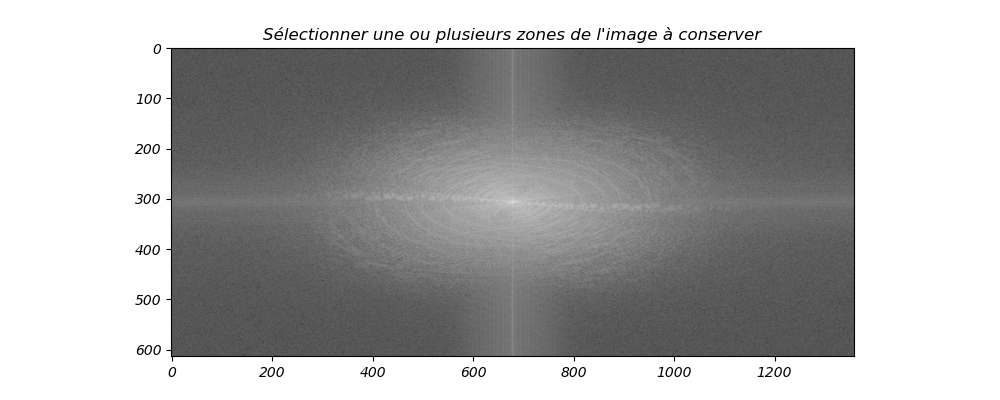

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import LassoSelector
from matplotlib.path import Path

img = Image.open(image_path) 
img_array = np.asarray(img)[:,:,1] #même chose, on convertit le rgb en une seule dimension

fourier_transform = fftshift(fft2(img_array))#on en prend à nouveau la tf





image=np.log(np.abs(fourier_transform))#l'image à afficher
inside_coords = []#les coordonnées sélectionnées au lasso
def onselect(verts):
    path = Path(verts) #le chemin tracé par l'utilisateur
    
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            if path.contains_point((x, y)):#on fait la liste des coordonnées de l'image contenues à l'intérieur de la forme dessinée
                inside_coords.append((x, y))
    print("Coordinates inside the lasso shape:", inside_coords)



fig, ax = plt.subplots(figsize=(10, 4))
ax.imshow(np.log(np.abs(fourier_transform)),cmap='gray')#on trace l'image support
ax.set_title('Sélectionner une ou plusieurs zones de l\'image à conserver')
lasso = LassoSelector(ax, onselect) #on appelle le sélecteur lasso


plt.show()





/tmp/ipykernel_212371/4287164321.py:43: RuntimeWarning: divide by zero encountered in log
  ax.imshow(np.log(np.abs(fftmask)), aspect='auto', origin='upper', picker=True,cmap='gray')#on trace le résultat pour validation


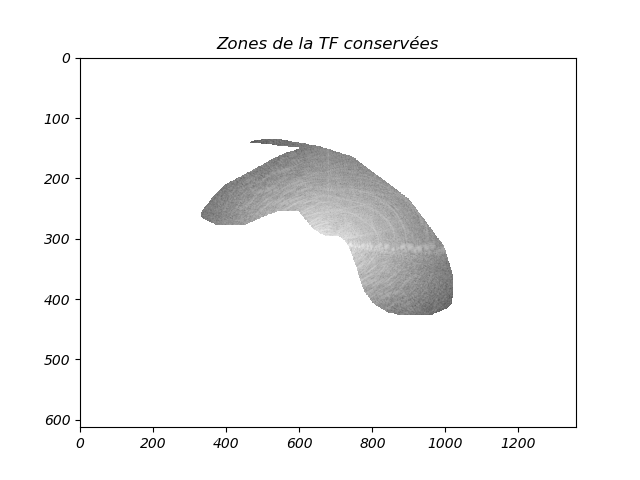

In [7]:
#Si le sélecteur lasso ne fonctionne pas, décommenter ce morceau de code :
"""

#À l'ancienne, on applique un masque circulaire (ou plusieurs), dont on spécifie les coordonnées du centre x0,y0 (en pixels), et son rayon
inside_coords=[]
R=100
x0,y0=920,340

for x in range(x0-R,x0+R):
    for y in range(y0-R,y0+R):
        if (x-x0)**2+(y-y0)**2<R**2:
            inside_coords.append([x,y])
"""
#-----------------------------------------------------------------------------------------



selected_values=np.copy(inside_coords)
sx,sy=np.shape(fourier_transform)
tokeep=np.ones(np.shape(fourier_transform))*False #on va faire une matrice de true/false selon si le pixel de l'image est dans le masque
#dessiné par l'utilisateur
for x in selected_values:
    tokeep[x[1],x[0]] = True
selected_values=tokeep

nx,ny = np.shape(fourier_transform)
selected_values = np.asarray(selected_values)
k=int(np.shape(selected_values)[0]/nx)

tooutput=np.ones(np.shape(fourier_transform)) 

for x in range(nx):
    for y in range(ny):
        tooutput[x,y]= any([selected_values[x+n*nx,y] for n in range(k)])#selon la version du code, selected_values peut être dupliquée
        #verticalement, on superpose donc les masques de chaque sous-tracé


fftmask = np.where(tooutput==False, 0, fourier_transform)#on met à 0 tous les points de la tf hors du masque


fig, ax = plt.subplots()
ax.set_title('Zones de la TF conservées')
ax.imshow(np.log(np.abs(fftmask)), aspect='auto', origin='upper', picker=True,cmap='gray')#on trace le résultat pour validation

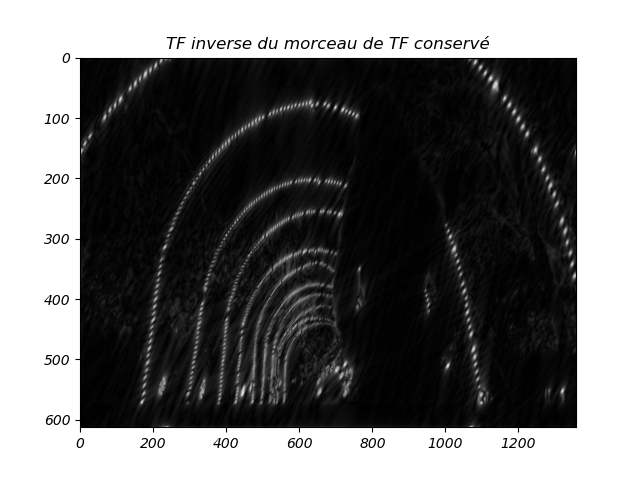

In [8]:
#On va maintenant prendre la TF inverse de notre TF rognée, voir quelle image ça donne.
fig, ax = plt.subplots()
ax.set_title('TF inverse du morceau de TF conservé')
ax.imshow(np.abs(ifft2(fftmask)), aspect='auto', origin='upper', picker=True,cmap='gray') #ifft2 permet de faire la TF inverse.
#Même chose, la TF inverse d'un signal réel est a priori complexe, on affiche donc le module.

<div class="alert alert-block alert-info">
<b>Info :</b> En recompilant les blocs ci-dessus, tu peux changer de zone(s) sélectionnée(s) sur la TF, ou encore changer d'image, jusqu'à avoir bien saisi comment se comporte une TF d'image.
</div>

**Q3.** Que se passe-t-il si on ne sélectionne pas le centre de la TF? Quel parallèle peut-on faire avec la TF temporelle usuelle?



***

<div class="alert alert-block alert-danger">
<b>Malheur :</b> Juste avant la première diffusion, les fichiers du film ont été corrompus, et sont maintenant bruités.
</div>

**Q4.** Écrire un script (sur ce notebook ou un duplicata) permettant, en partant d'une des 5 images bruitées fournies, de produire une image où l'effet du bruit est largement diminué. On peut complètement se resservir de blocs de code ci-dessus si besoin. Une base de départ se trouve ci-dessous.

<details><summary>Indice</summary> C'est sûrement un bon départ que de tracer la TF de chaque image. <details><summary>Indice2</summary>Peut-être qu'un masque peut exclure le bruit. Ne pas hésiter à faire simple, il n'est pas forcément nécessaire de se prendre la tête avec le sélecteur "lasso" vu ci-dessus. </details></details>


**Q5\*.** Quantifier la quantité de bruit d'une image, en utilisant éventuellement les images nettes comme référence.

394.21695726167275 1208.3014394840707


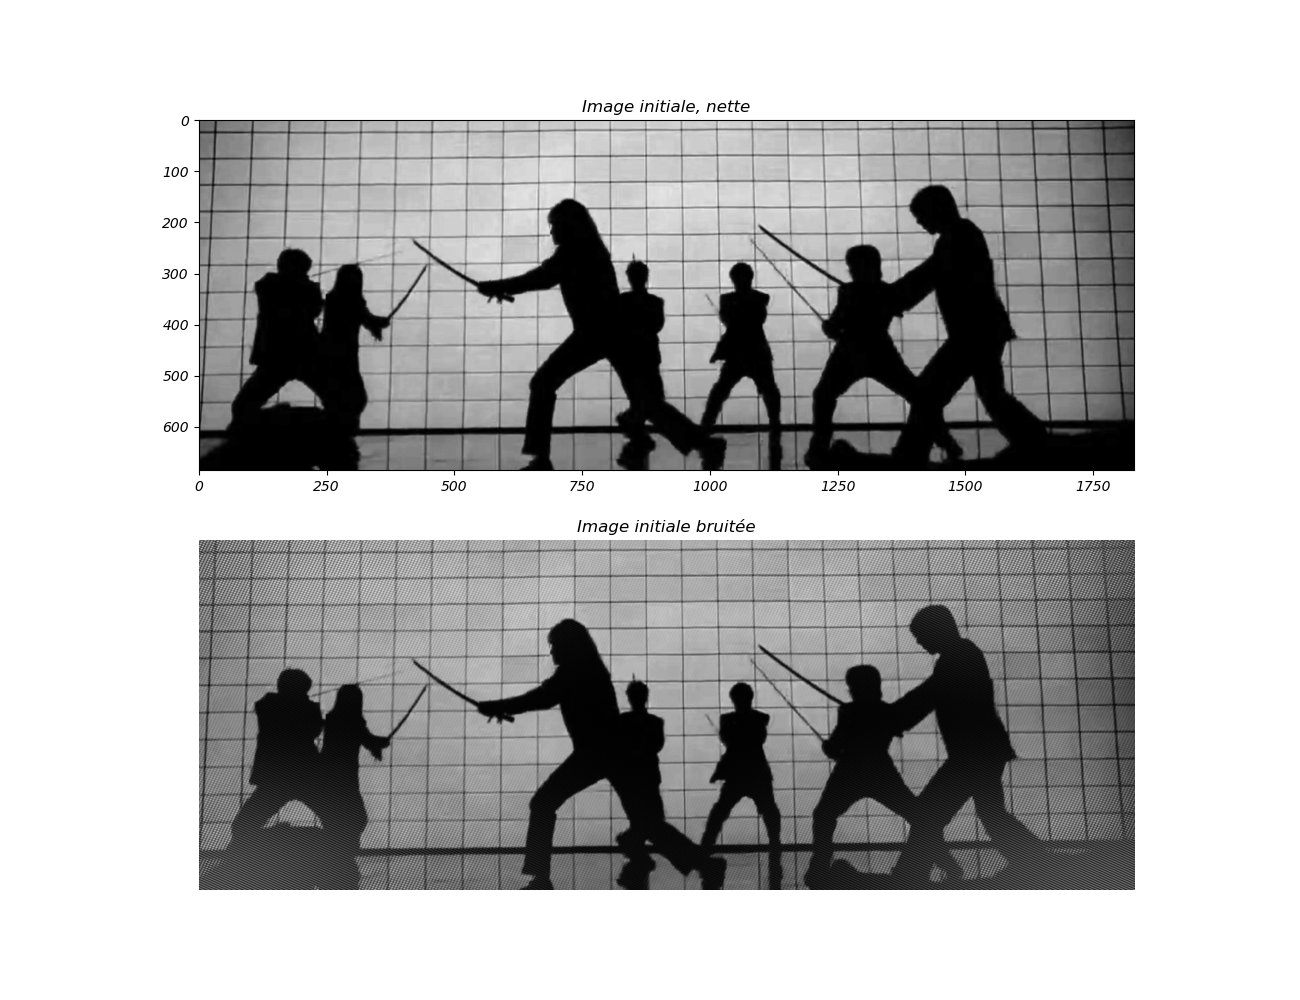

In [9]:
image_path = 'img_nb1.png' #au choix


img = Image.open(image_path)#On ouvre l'image

img_array = np.asarray(img)[:,:,1]#C'est une image en noir et blanc, mais en RGB. On ne garde que le channel vert pour avoir une seule valeur par pixel
#c'est désormais un array numpy avec une valeur par pixel


plt.figure(figsize=(13, 10))
plt.subplot(2, 1, 1)
plt.imshow(img_array, cmap='gray')#on trace l'image initiale, nous servant d'objectif ici 
plt.title('Image initiale, nette')


imnoise=noisemaker(img_array)#Cette fonction prend l'image nette et produit l'image bruitée servant de départ à l'exercice.
#Son fonctionnement est volontairement obscur et masqué, pour qu'on exploite autant que possible les outils que l'on vient de découvrir


plt.subplot(2, 1, 2)
plt.imshow(imnoise, cmap='gray')
plt.title('Image initiale bruitée')#on trace l'image initiale, nous servant de point de départ
plt.axis('off')

#-------------------------------------------------------------------------------------------

#À vous de jouer !

   


plt.show()


